# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
%pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 68.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 39.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 38.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 81.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 61.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install citipy

  Using cached citipy-0.0.6.tar.gz (675 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached kdtree-0.16-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675966 sha256=0bf46610c2b5f19fa08efc7fc3ee34b03cdd2cc776ae046c3996a297b4fac308
  Stored in directory: /Users/wenlirui/Library/Caches/pip/wheels/e9/27/5f/7defd70aaec29af33fe5e2110843e14dcfc44cba710a0dd957
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [8]:
import time
import datetime

In [16]:
from pathlib import Path
import os

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
for i, city in enumerate(cities):
    city_weather = requests.get(city_url + city.replace(" ","+")).json()
print(city_weather)

{'coord': {'lon': 29.5448, 'lat': -31.6229}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.45, 'feels_like': 15.98, 'temp_min': 16.45, 'temp_max': 16.45, 'pressure': 1033, 'humidity': 70, 'sea_level': 1033, 'grnd_level': 1032}, 'visibility': 10000, 'wind': {'speed': 2.86, 'deg': 51, 'gust': 3.51}, 'clouds': {'all': 71}, 'dt': 1717863618, 'sys': {'country': 'ZA', 'sunrise': 1717822615, 'sunset': 1717859111}, 'timezone': 7200, 'id': 964408, 'name': "Port Saint John's", 'cod': 200}


In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city.replace(" ","+")).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.datetime.fromtimestamp(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | san felipe
Processing Record 5 of Set 1 | lander
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | ribadesella
Processing Record 8 of Set 1 | wynyard
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | naryn
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | nadym
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | donggang
Processing Record 17 of Set 1 | ayr
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | la passe
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | punta are

In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [35]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,22.14,73,40,4.14,PT,2024-06-08 09:18:43
1,grytviken,-54.2811,-36.5092,-2.51,83,18,2.72,GS,2024-06-08 09:18:43
2,adamstown,-25.0660,-130.1015,22.58,82,63,4.66,PN,2024-06-08 09:18:43
3,san felipe,10.3399,-68.7425,34.57,38,21,3.11,VE,2024-06-08 09:18:43
4,lander,42.8330,-108.7307,20.62,52,0,2.57,US,2024-06-08 09:18:43


In [36]:
# Export the City_Data into a csv
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir) 
data_dir = os.path.join(parent_dir, "output_data")

file_path = os.path.join(data_dir, 'cities.csv')

city_data_df.to_csv(file_path, index=False)


print(f"CSV file saved to: {file_path}")

CSV file saved to: /Users/wenlirui/Desktop/Starter_Code-4/output_data/cities.csv


In [37]:
# Read saved data
city_to_load = os.path.join(parent_dir, "output_data", "cities.csv")
city_data_df = pd.read_csv(city_to_load)


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,22.14,73,40,4.14,PT,2024-06-08 09:18:43
1,grytviken,-54.2811,-36.5092,-2.51,83,18,2.72,GS,2024-06-08 09:18:43
2,adamstown,-25.0660,-130.1015,22.58,82,63,4.66,PN,2024-06-08 09:18:43
3,san felipe,10.3399,-68.7425,34.57,38,21,3.11,VE,2024-06-08 09:18:43
4,lander,42.8330,-108.7307,20.62,52,0,2.57,US,2024-06-08 09:18:43


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The plot proves that as we generally move away from the equator, temperature drops


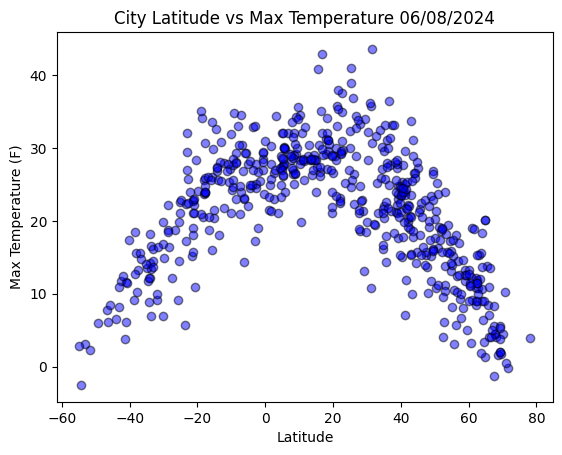

In [44]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
# YOUR CODE HERE
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Max Temp"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature {today}")
print("The plot proves that as we generally move away from the equator, temperature drops")
# Save the figure
plt.savefig(data_dir+"Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The plot shows that there is no real pattern that can describe the relationship between latitude and humidity


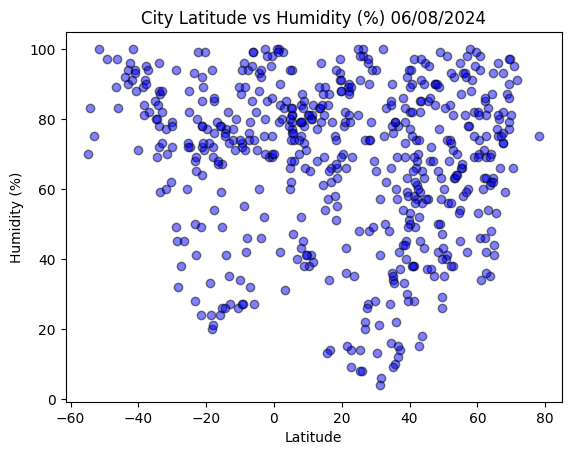

In [45]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Humidity"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) {today}")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and humidity")
# Save the figure
plt.savefig(data_dir+"Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

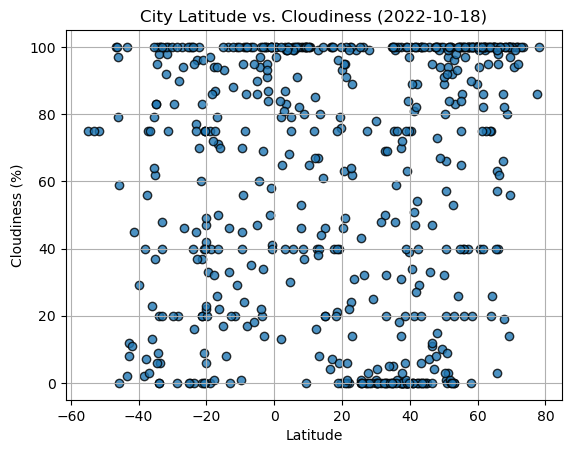

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(pd.to_numeric(weather_df["Lat"]).astype(float), pd.to_numeric(weather_df["Cloudiness"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and cloudiness")
# Save the figure
plt.savefig(data_dir+"Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

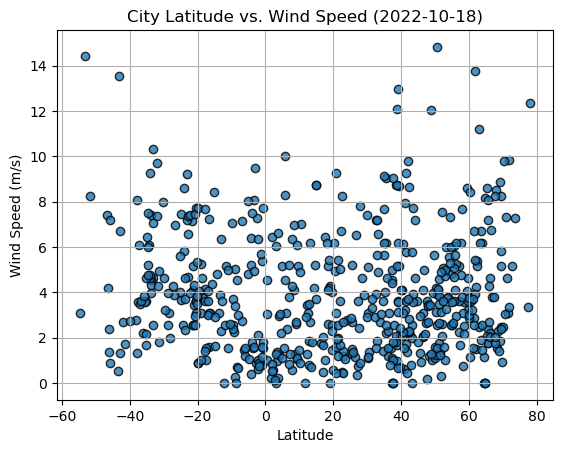

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig(data_dir+"Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


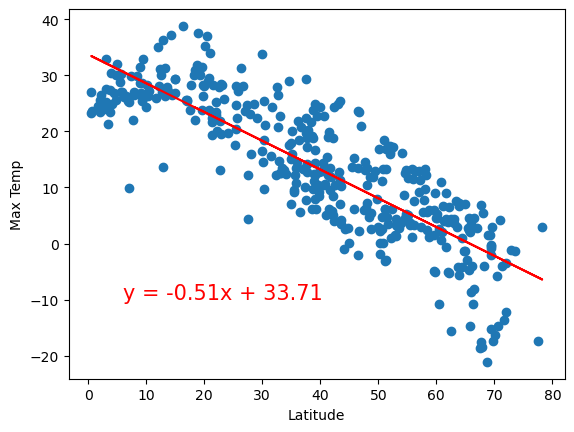

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


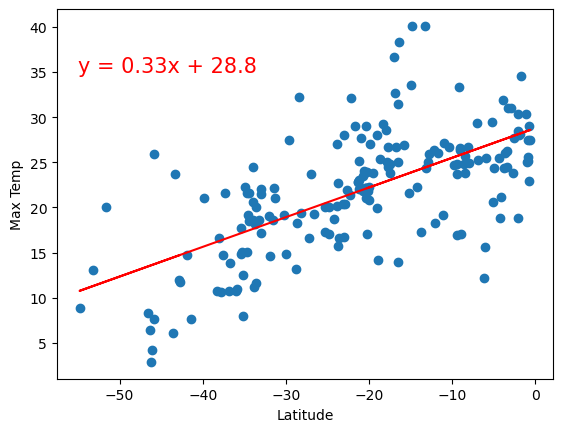

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


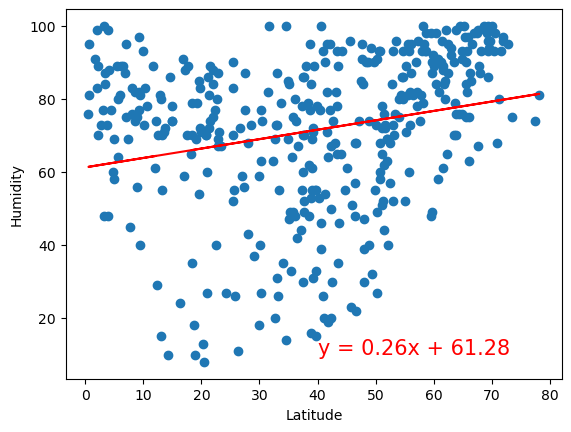

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


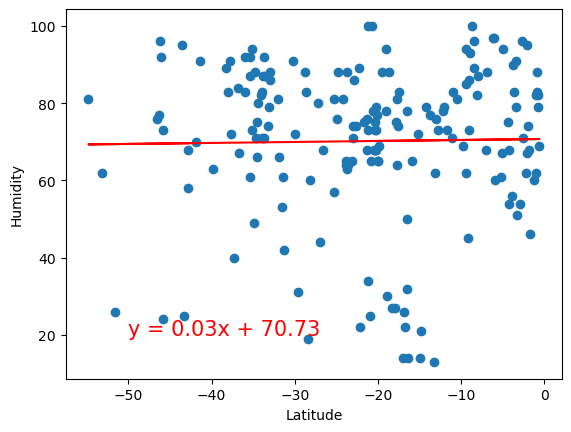

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


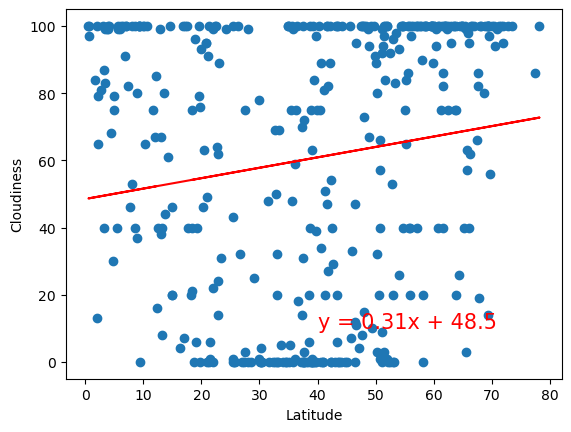

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


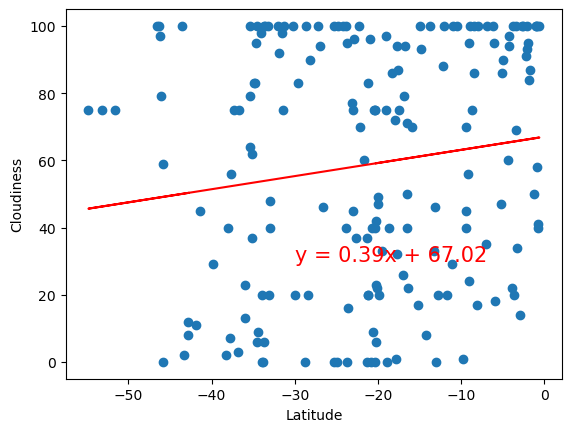

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


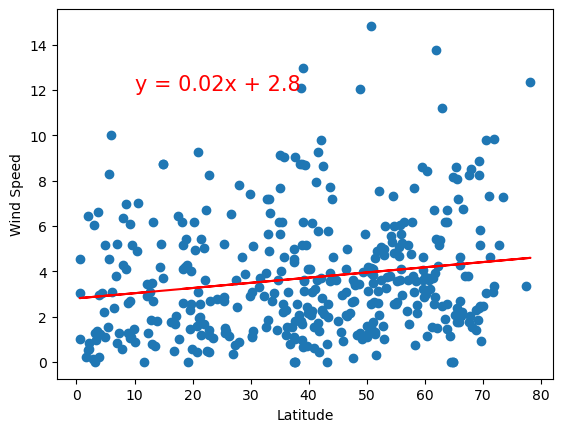

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


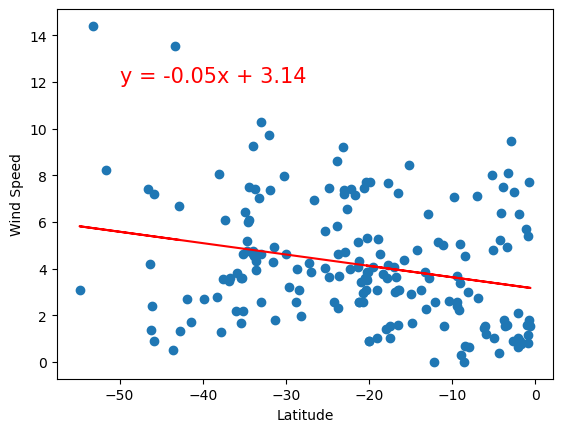

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE